<a href="https://colab.research.google.com/github/ulya1202/NLP/blob/main/Multilingual_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multilingual NER

In [ ]:
#yaxinnasha terzi , --> brert her dilde olan  #100 dili oyreen bir modee , hetta 1 dil uzre classifiaction uyrensende o bir 200 dilid ebilmish olur

In [ ]:
import pandas as pd


In [ ]:
!pip install --upgrade datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 1

1. xtreme nədir?
XTREME (Cross-lingual TRansfer Evaluation of Multilingual Encoders) — bu, çoxdilli modellərin performansını qiymətləndirmək üçün bir neçə müxtəlif NLP vəzifəsindən ibarət olan benchmark-dır:

    1.   XQuAD – sual-cavab
    2.   MLQA – çoxdilli sual-cavab
    3.   PAN-X – NER (Named Entity Recognition)
    4.   TydiQA – sual-cavab
    5.   BUCC – paralel cüt tapmaq


In [ ]:
from datasets import load_dataset

load_dataset('xtreme', name='PAN-X.de')
#Bu, Hugging Face datasets kitabxanasından xtreme adlı böyük çoxdilli benchmark-dan bir alt-dataset yükləyir: "PAN-X.de", yəni Panx datasetinin Alman dili versiyası.
#langs — dillər haqqında məlumat

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [ ]:
from collections import defaultdict
from datasets import DatasetDict #dataset strukturu:train,valid,test kimi olan daatsetler ucun

langs = ["de", "fr", "it", "en"] #4 dil
fracs = [0.629, 0.229, 0.084, 0.059] #her dil ucun nece faiz data secilecek
panx_ch = defaultdict(DatasetDict)#hər bir dil üçün bir DatasetDict (train/validation/test) saxlayacaq.


#Bu kod, hər bir dil üçün PAN-X datasını yükləyir, train, validation, test hissələrini qarışdırır və onlardan yalnız müəyyən faiz (frac qədər)
# nümunə seçərək panx_ch adlı sözlükdə saxlayır.
for lang, frac in zip(langs, fracs):
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))

train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/459k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
panx_ch

defaultdict(datasets.dataset_dict.DatasetDict,
            {'de': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 12580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
             }),
             'fr': DatasetDict({
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 4580
                 })
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 2290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'la

In [ ]:
import pandas as pd
pd.DataFrame({lang:[panx_ch[lang]['train'].num_rows] for lang in langs}, #her language den nece example gelir
             index=['Number of training examples'])

(                                de    fr    it    en
 NUmber of training examples  12580  4580  1680  1180,)

In [ ]:
panx_ch['de']['train'][0]

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de']}

In [ ]:
panx_ch['de']['train'].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
element=panx_ch['de']['train'][0]
for key, value in element.items():
    print(f'{key}:{value}')

tokens:['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags:[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs:['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
for key,value in panx_ch['de']['train'].features.items():
    print(f'{key}:{value}') #length=-1 → bu o deməkdir ki, sıra uzunluğu dəyişkəndir, sabit deyil.

tokens:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags:Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs:Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
panx_ch['de']['train'].features['ner_tags'].feature

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [ ]:
def create_tag_names(batch, tags):#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    return {'ner_tags_str':[tags.int2str(idx) for idx in batch['ner_tags']]} #int2str → ClassLabel obyektində olan etiket indeksini (int) onun adına (str) çevirir.

ner_tags_feature = panx_ch['de']['train'].features['ner_tags'].feature
panx_de = panx_ch['de'].map(create_tag_names, fn_kwargs={'tags': ner_tags_feature})#funksiyay elave  qarumentler otur

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
panx_ch['de']['train'].features['ner_tags'].feature

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

#MultiLingual

In [ ]:
from transformers import AutoTokenizer
#roberta bertin inkishaf olunmush , robert facebook, daha data cox dat internet , dah ayaxsi hyperparametr tuning, cox epoch train, bert-->wiki,kitab
#roberta NSP -ni atiblar yoxdu pretrainde
#xlm roberta--sentence piece
#bert --wordpiece

#xlm--arxitektura eyni--> 100 den cox dil
bert_model_name='bert-base-cased'#case sensetive , sentiment lazim deyil, NER de amma lazimdi
xlmr_model_name='xlm-roberta-base'
bert_tokenizer=AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer=AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
text='Jack Sparrow love New York'
bert_tokens=bert_tokenizer(text).tokens()
xlmr_tokens=xlmr_tokenizer(text).tokens()#senetnce piece <s> </s>
#normalization boyu-->balaca , eyni formata salir , boshluqlari silir,
#pretokenizer boshluqlara gore, xlm de yoxdu
#postprocessing bizim basha dusheeyimiz dilde

In [ ]:
df=pd.DataFrame([bert_tokens, xlmr_tokens],
                 index=['Bert','XLM-R']) #yanida hecne yoxdurss_
#robert-->robust fln
df

,0,1,2,3,4,5,6,7
Bert,[CLS],Jack,Spa,##rrow,love,New,York,[SEP]
XLM-R,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>


# SentencePiece Tokenize

In [ ]:
''.join(xlmr_tokens).replace('\u2581',' ') #bu _ xettin kodud unicod \u2581

'<s> Jack Sparrow love New York</s>'

#Creating Customer Model for Token Classification

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput #bir tensor qaytarir , tensoru suzgunnformat--> spesifik format loss, bu o
from transformers.models.roberta.modeling_roberta import RobertaModel #xlmRobert adah asan olardi , amma arxitektura eynu, biz amma xlm weightlerin yukleyirik
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel #weight initilizer




In [ ]:
# Head--> Ber for ne uchun Body oyrenib Head 0 dan  , onu oyredirik, bizde HEAd olamsa?? HUggingFace 'token classificton'--body+head-NER-di

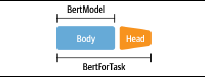

In [ ]:
#ozuumz duzeldirik
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class=XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)#-nniye burada config yazdiq--------?
        self.num_labels=config.num_labels

        self.roberta=RobertaModel(config, add_pooling_layer=False) #cls tokeni var istemirem
        self.dropout=nn.Dropout(config.hidden_dropout_prob)
        self.classifier=nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()#hans iactivation fln

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs=self.roberta(input_ids, attention_mask=attention_mask,token_type_ids=None, **kwargs )

        sequence_output=self.dropout(outputs[0])#outputs[0]--->hidden_state
        logits=self.classifier(sequence_output)#softmaxsiz

        loss=None
        if labels is not None:
            loss_fct=nn.CrossEntropyLoss()
            loss=loss_fct(logits.view(-1, self.num_labels), labels.view(-1))#reshape output label--> 2d , cavab 1d olmalidi 4*8--32, 32-8, bu daha suretli , pytrochum matrixle ishleme , pytorch duz baxirr, view olani modifiksiya edir,

        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hiddden_states=outputs.hidden_states, attention=outputs.attentions)#TokenClassifierOutput

#Loading a Cutom Model

In [ ]:
# Loading a Cutom Model
tags=ner_tags_feature
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
from transformers import AutoConfig

xlmr_config=AutoConfig.from_pretrained(xlmr_model_name,
                                       num_labels=tags.num_classes,#ne qedr layer
                                       id2labels=index2tag, #nece ves.
                                       label2id=tag2index)

In [ ]:
xlmr_config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.52.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [ ]:
import torch

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') #DEVICE GPUU!!!!!!!!!!!!!!!
xlmr_model=XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device) #heritage etdiyiu uchun pretrained olur


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#datani hazirla
input_ids=xlmr_tokenizer.encode(text, return_tensors='pt') #encode ne dirdi?? niye bele
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=['Tokens','Input IDs'])

,0,1,2,3,4,5,6,7
Tokens,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>
Input IDs,0,21763,37456,15555,5161,2356,5753,2


In [ ]:
############################DUZET YUXARINI
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel
from transformers import AutoTokenizer, AutoConfig
import torch

# Define the custom model class
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class=XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels=config.num_labels

        self.roberta=RobertaModel(config, add_pooling_layer=False)
        self.dropout=nn.Dropout(config.hidden_dropout_prob)
        self.classifier=nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, labels=None,num_items_in_batch=None, **kwargs):
        # Remove labels=None from the call to self.roberta
        outputs=self.roberta(input_ids, attention_mask=attention_mask,token_type_ids=None, **kwargs)

        sequence_output=self.dropout(outputs[0])
        logits=self.classifier(sequence_output)

        loss=None
        if labels is not None:
            loss_fct=nn.CrossEntropyLoss()
            # Ensure logits and labels are reshaped correctly for CrossEntropyLoss
            loss=loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        # Correct the return value key for hidden states (should be hidden_states, not hiddden_states)
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states, attentions=outputs.attentions)

# Assuming these variables are already defined from previous cells
# ner_tags_feature = panx_ch['de']['train'].features['ner_tags'].feature
# tags = ner_tags_feature
# index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
# tag2index = {tag: idx for idx, tag in enumerate(tags.names)}
# xlmr_model_name = 'xlm-roberta-base'
# text = 'Jack Sparrow love New York'

# Define tags and mappers (assuming they are defined elsewhere)
tags = panx_ch['de']['train'].features['ner_tags'].feature
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}


# Load configuration
xlmr_config=AutoConfig.from_pretrained(xlmr_model_name,
                                       num_labels=tags.num_classes,
                                       id2labels=index2tag,
                                       label2id=tag2index)

# Set device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the custom model
xlmr_model=XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device)

# Tokenize input text
xlmr_tokenizer=AutoTokenizer.from_pretrained(xlmr_model_name)
input_ids=xlmr_tokenizer.encode(text, return_tensors='pt')
xlmr_tokens=xlmr_tokenizer(text).tokens()

# Get model outputs and predictions
outputs=xlmr_model(input_ids.to(device)).logits
predictions=torch.argmax(outputs, dim=-1)

print(f'Num of token in sequence: {len(predictions[0])}')
print(f'Shape of outputs tensor: {outputs.shape}')

Num of token in sequence: 8
Shape of outputs tensor: torch.Size([1, 8, 7])


In [ ]:
outputs

tensor([[[-4.0034e-01,  2.5072e-01, -2.3815e-01, -5.1776e-01,  1.0177e-01,
           8.1291e-01,  1.7350e-02],
         [-3.1795e-01,  1.7164e-01,  6.6548e-02, -5.3782e-01, -6.2002e-02,
           6.4139e-01, -3.4896e-02],
         [-3.7690e-01,  4.4164e-02,  1.1145e-01, -5.5668e-01,  3.5889e-02,
           6.1349e-01,  3.0429e-02],
         [-3.7934e-01,  1.7546e-01,  9.2623e-03, -5.5410e-01, -6.1755e-02,
           5.5320e-01, -5.3435e-03],
         [-3.3731e-01,  2.3147e-01,  3.3132e-02, -4.9790e-01,  4.6873e-04,
           5.4025e-01,  2.3432e-02],
         [-2.4475e-01,  1.8267e-01,  1.2544e-02, -6.1766e-01, -6.6564e-02,
           5.9193e-01,  2.8623e-02],
         [-2.7101e-01,  1.4455e-01,  7.0657e-02, -6.1833e-01, -1.0862e-01,
           5.6642e-01,  1.7324e-02],
         [-3.7720e-01,  2.6436e-01, -2.5031e-01, -5.3399e-01,  9.6206e-02,
           8.0437e-01, -1.2523e-02]]], grad_fn=<ViewBackward0>)

In [ ]:
predictions

tensor([[5, 5, 5, 5, 5, 5, 5, 5]])

In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds])

,0,1,2,3,4,5,6,7
0,<s>,▁Jack,▁Spar,row,▁love,▁New,▁York,</s>
1,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC


In [ ]:
def tag_text(text, tags, model, tokenizer):#kecendefeki
    tokens = tokenizer(text).tokens() #Bu isə, yuxarıdakı tokenizer nəticəsindən sadəcə tokenləri çıxarır (yəni [‘play’, ‘##ing’] kimi nəticə verir).
    input_ids = tokenizer.encode(text, return_tensors='pt')#reqem kim --Bu hissə text mətnini alır və onu token ID-lərinə çevirir.Yəni sözlər → subword tokenlər → rəqəmlər (ID-lər)
    outputs = model(input_ids.to(device))[0] #last_hidden_state
    predictions = torch.argmax(outputs, dim=-1) #calssi verir yeni BIO-da hansi calssa argmaxi coxdu--> bu
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])
# text = "Obama"
# tokens = ['O', '##bam', '##a']
# input_ids = [101, 1234, 5678, 102]
#outputs=outputs.shape = [batch_size, sequence_length, num_tags]
#predictions = [[0, 2, 2, 0, 4, 5, 0, 3, 3, 0]]
# predictions = [0, 2, 2, 1]
# tags.names = ['O', 'B-PER', 'I-PER']
# preds = ['O', 'I-PER', 'I-PER', 'B-PER']


In [ ]:
# 1. tokenizer(text)
    # Bu hissə, tokenizer obyektinə text adlı mətni verir və tokenizer onu emal edir.
    # Məsələn: text = "playing"
    # Tokenizer: WordPiece, Unigram və s.
    # Nəticə: Tokenizer obyektindən çıxan bir Encoded object (məs: Encoding).

# output = (
#     last_hidden_state,     # [0] → əsas nəticə (ən çox istifadə olunan)
#     pooled_output,         # [1] → CLS tokenin çıxışı (ən çox klassifikasiya üçün istifadə olunur)
#     hidden_states (optional),
#     attentions (optional)
# )

#Tokenizing Texts for NER

In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [ ]:
words, labels=de_example['tokens'], de_example['ner_tags']

In [ ]:
words

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

In [ ]:
tokenized_input=xlmr_tokenizer(words, is_split_into_words=True) #sozlere bolunu b yoxsa yox, string olara false
tokens=xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens,labels], index=['Tokens','Labels'])#sozler bolunu  label ile solzer ust uste duhmur

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Labels,0,0,0,0,5,6,0,0,5,5,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
tokenized_input #etxt--reqem

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenized_input.word_ids()

[None,
 0,
 1,
 1,
 2,
 3,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 None]

In [ ]:
word_ids=tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=['Tokens','Word IDs'])# eyni soelr yeni reqemlerle, NONElere -100 deyeceyik,  pytorchda -100 ignore edir

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [ ]:
label_ids

[-100,
 'IGN',
 'O',
 -100,
 'O',
 'IGN',
 'O',
 -100,
 -100,
 'O',
 -100,
 'B-LOC',
 'IGN',
 'IGN',
 -100,
 'I-LOC',
 -100,
 -100,
 -100,
 'IGN',
 -100,
 -100,
 'O',
 -100,
 -100]

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
previous_word_idx=None
label_ids=[]

for word_idx in word_ids:
    if word_idx is None or word_idx==previous_word_idx:
        label_ids.append(-100)
    else:
        label_ids.append(labels[word_idx])
    previous_word_idx=word_idx

labels=[index2tag[l] if l!=-100 else 'IGN' for l in label_ids]
index=['Tokens','Word IDs','Label IDs','Labels']
df=pd.DataFrame([tokens, word_ids,label_ids, labels], index=index)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(
        examples["tokens"],
        truncation=True,
        is_split_into_words=True,
        padding=True
    )

    all_labels = []

    for i in range(len(examples["tokens"])):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        labels = []
        previous_word_idx = None
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                labels.append(-100)
            else:
                labels.append(examples["ner_tags"][i][word_idx])
            previous_word_idx = word_idx
        all_labels.append(labels)

    tokenized_inputs["labels"] = all_labels
    return tokenized_inputs


def encode_panx_dataset(corpus):
    encoded_corpus = DatasetDict()
    for split, dataset in corpus.items():
        encoded_corpus[split] = dataset.map(
            tokenize_and_align_labels,
            batched=True,  # Doğrudur burada
            remove_columns=["langs", "ner_tags", "tokens"]
        )
    return encoded_corpus


panx_de_encoded = encode_panx_dataset(panx_ch["de"])
print(panx_de_encoded["train"][0])


Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': [-100, 0, 0, -100, 0, 0, 5, -100, -100, 6, -100, 0, 0, 5, -100, 5, -100, -100, -100, 6, -100, -100, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=271e7d14ebcebfbc3e5ade059d82dbb659f1384c35a2150d7f4b241192bf7213
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [ ]:
from seqeval.metrics import classification_report

y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]

# You can now use the corrected function:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
import numpy as np #hugging face list ichind elist gozleyir
def align_predictions(predictions, label_ids):
    preds=np.argmax(predictions, axis=2)
    batch_size, seq_len=preds.shape
    label_list, preds_list=[],[]

    for batch_idx in range(batch_size):
        example_labels, example_preds=[],[]
        for seq_idx in range(seq_len):
            if label_ids[batch_idx, seq_idx]!=-100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
        label_list.append(example_labels)
        preds_list.append(example_preds)
    return preds_list, label_list


#Fine-Tuning XLM-RoBerta

In [ ]:
from transformers import TrainingArguments

num_epochs=3
batch_size=24
logging_steps=len(panx_de_encoded['train'])//batch_size

model_name=f'{xlmr_model_name}-finetuned-panx-de'
training_args=TrainingArguments(
    output_dir=model_name, log_level='error', num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    eval_strategy='epoch',
    save_steps=1e6, #100 000 addimdan bir save etsin yeni etmesin  her iterasiyada  save etmek istemirk, istesek epoch yaz
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True
)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true=align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {'f1':f1_score(y_true, y_pred)} #butun duhmeldui ust uste

In [ ]:
from transformers import DataCollatorForTokenClassification #Ner uchun Pad etmeye, her defe ramd ayer tutur model , funkdiyani ichine yukleyek modlei ordan caqirsin

# Correct the typo in the class name
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
def model_init():
    return XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name,
                                                            config=xlmr_config).to(device)



In [ ]:
from transformers import Trainer

trainer=Trainer(model_init=model_init,
                args=training_args, #compile
                data_collator=data_collator,#nece pad
                compute_metrics=compute_metrics, #hani metrics
                train_dataset=panx_de_encoded['train'],
                eval_dataset=panx_de_encoded['validation'],
                tokenizer=xlmr_tokenizer)

<ipython-input-89-6e7e6c71e77c>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(model_init=model_init, args=training_args,


In [ ]:
trainer.train()
# trainer.push_to_hub(config)


TypeError: RobertaModel.forward() got an unexpected keyword argument 'num_items_in_batch'

In [ ]:
trainer.push_to_hub()